In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import os
from sklearn.decomposition import PCA

# 5. PCA

In [15]:
num_imgs = len(os.listdir("preprocessed"))
images = np.empty((num_imgs, 64, 64), dtype=np.uint8)
for i, image in enumerate(sorted(os.listdir("preprocessed"))):
    im = Image.open("preprocessed/" + image)
    images[i,:,:] = np.array(im)

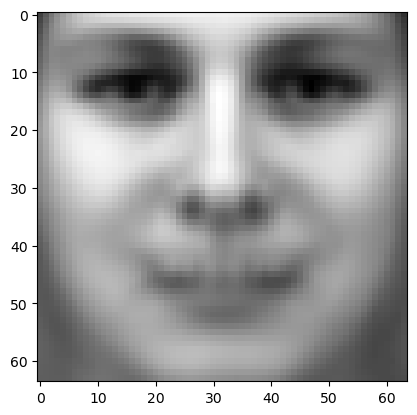

In [16]:
mean_image = images.mean(axis=0)
plt.imshow(mean_image, cmap="gray")
plt.show()

In [17]:
centered = images - mean_image
centered = centered.reshape(centered.shape[0], 64*64)

In [18]:
pca = PCA()
pca.fit(centered)

PCA()

In [19]:
transformed = pca.transform(centered)

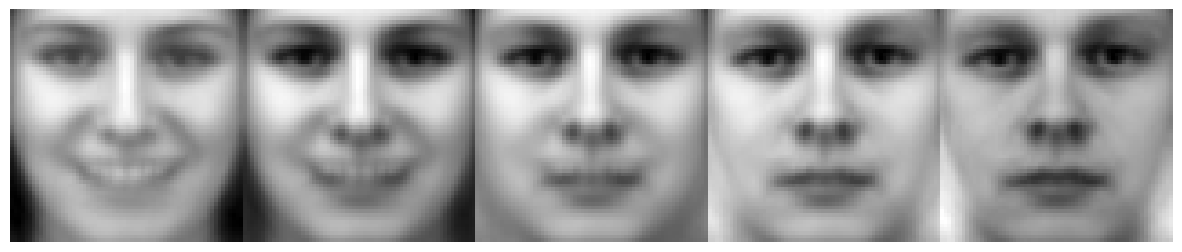

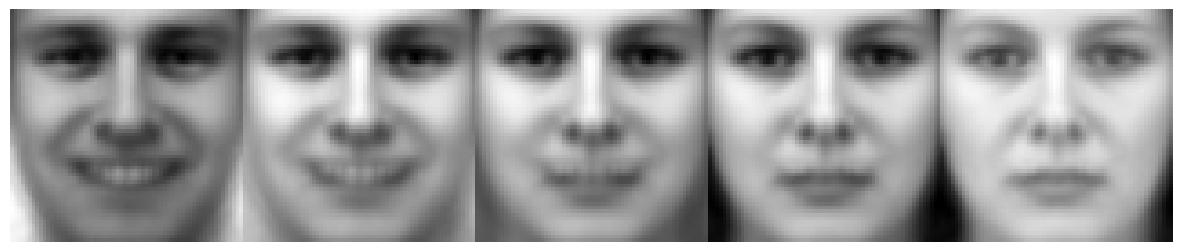

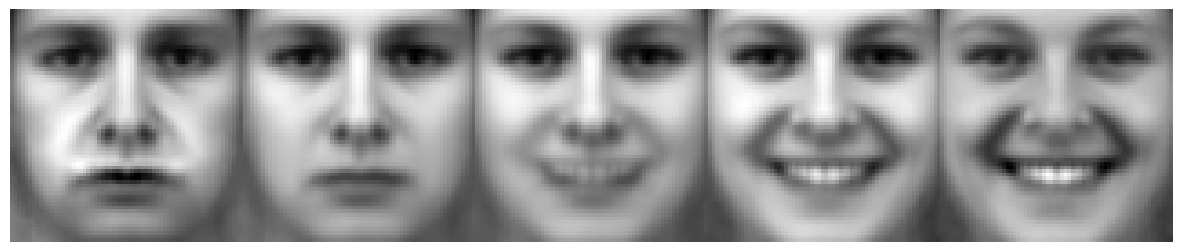

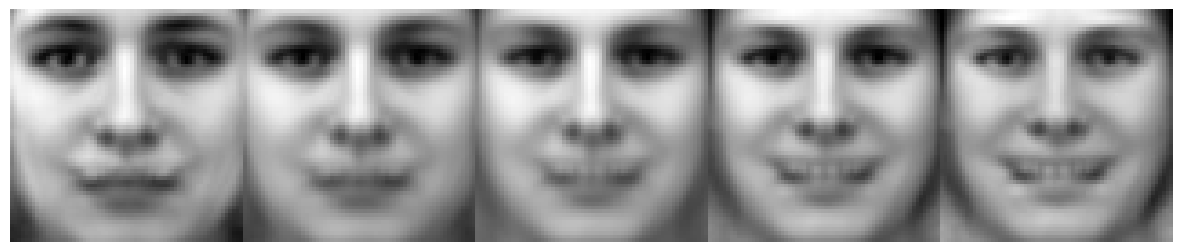

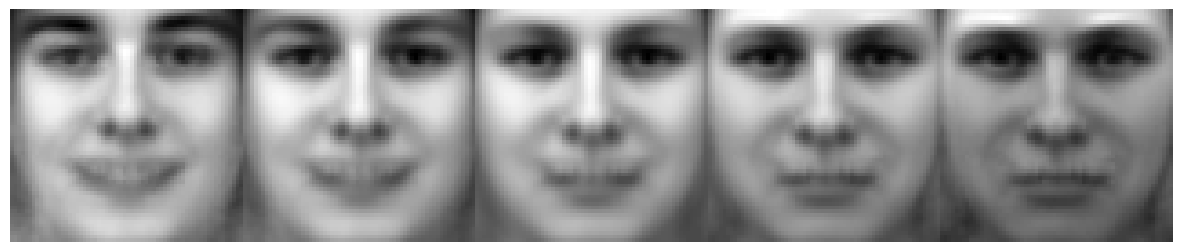

In [20]:
spectrum = 5
pcs = 5

for p in range(pcs):
    max = transformed[:,p].max()
    min = transformed[:,p].min()
    imgs = []
    for i in range(spectrum):
        value = min * (spectrum-1-i) / (spectrum - 1) + max * i / (spectrum - 1)
        vec = np.zeros((396))
        vec[p] = value
        img = pca.inverse_transform(vec).reshape(64,64) + mean_image
        imgs.append(img)
    f, axarr = plt.subplots(1,spectrum, figsize=(15,7))
    plt.subplots_adjust(wspace=0,
                    hspace=0)
    for i in range(spectrum):
        axarr[i].axis('off')
        axarr[i].imshow(imgs[i], cmap="gray")
    plt.show()

In [21]:
exp_var_pca = pca.explained_variance_ratio_
exp_var_pca[:5]

array([0.26343226, 0.14250964, 0.0713695 , 0.05346344, 0.04269085])

# Feature selection

In [22]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.linear_model import LinearRegression

In [23]:
ratings_df = pd.read_csv("ratings.csv", index_col=0)
ratings_df = ratings_df.sort_values("Image_ID")
ratings_df

aggregate = np.array(ratings_df.iloc[:,[1,2,3]].mean(axis=1))

In [24]:
lin_reg = LinearRegression()


In [28]:
sfs = SequentialFeatureSelector(lin_reg, n_features_to_select= 'auto', tol = 0, n_jobs = -1, scoring= 'r2')
sfs.fit(transformed, aggregate)

SequentialFeatureSelector(estimator=LinearRegression(),
                          n_features_to_select='auto', n_jobs=-1, scoring='r2',
                          tol=0)

In [35]:
idx = np.where(sfs.get_support())

In [36]:
print(idx)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  26,
        27,  28,  30,  31,  32,  33,  35,  37,  38,  41,  45,  46,  47,
        48,  49,  51,  52,  53,  55,  56,  57,  59,  60,  62,  63,  64,
        66,  67,  68,  69,  70,  71,  73,  75,  77,  78,  79,  81,  84,
        85,  86,  88,  94,  97, 100, 102, 103, 104, 105, 106, 107, 109,
       112, 113, 115, 117, 118, 122, 123, 124, 127, 129, 130, 132, 133,
       134, 137, 142, 148, 152, 154, 155, 159, 162, 165, 166, 167, 171,
       173, 174, 177, 179, 180, 182, 183, 184, 186, 189, 190, 192, 198,
       199, 202, 203, 204, 207, 209, 217, 222, 224, 226, 229, 230, 234,
       239, 240, 249, 255, 260, 261, 265, 266, 267, 272, 276, 277, 280,
       284, 285, 287, 293, 295, 296, 297, 307, 309, 313, 314, 316, 318,
       321, 329, 330, 335, 338, 341, 342, 345, 348, 353, 366, 367, 372,
       378, 379, 386], dtype=int64),)
